# <b>CV0003: Introduction to Data Science and Artificial Intelligence Mini Project</b>

<b> Group Member:</b>
1.  ()
2.  ()
3.  ()
4.  ()
5.  ()
---

## <b>A. Problem Introduction</b>

- **Title:**   

- **Objective:**   

- **Motivation:**   

- **Research Questions:**   


## <b>B. Data Extraction</b>
In this project, we use the API provided by DataMall to extract the real-time data.

Based on the description:
> From the dataset, important features may use:
- `timestamp`: time when the data was being extracted
- `carpark_id`: the carpark id
- `area`: where the carpark located
- `development`: what the carpark name
- `latitude`: latitude position
- `longitude`: longitude position
- `available_lots`: available lots during that time
- `lot_type`: the type of lot
- `agency`: who built the lot

> Use the `carpark_collector.py` file

## <b>C. Data Preparation</b>


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Combine the dataset into one dataframe
dir_path = r"src\raw"
result_folder = r"src\processed"

# Create an empty list to store dataframes
data_frames = []

# Loop through all the files in the directory
for filename in os.listdir(dir_path):
    if filename.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(dir_path, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        data_frames.append(df)  # Add the DataFrame to the list

# Concatenate all DataFrames
combined_df = pd.concat(data_frames, ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
output_file = 'combined_file.csv'
os.makedirs(result_folder, exist_ok=True)
combined_df.to_csv(os.path.join(result_folder, output_file), index=False)

In [3]:
final_df = pd.read_csv (r"src\processed\combined_file.csv")
final_df.sample(10) # random sample

,timestamp,carpark_id,area,development,latitude,longitude,available_lots,lot_type,agency
618,2025-10-28 19:06:28,B34,NaN,BLK 134/136 BEDOK NORTH AVENUE 3,1.328312,103.935673,204,C,HDB
11420,2025-10-31 13:27:49,B41,NaN,BLK 510 BEDOK NORTH STREET 3,1.332555,103.931493,22,C,HDB
9474,2025-10-30 10:26:35,P0109,NaN,PASIR RIS PARK CAR PARK E OFF STREET,1.384596,103.943893,21,C,URA
9989,2025-10-30 12:06:47,B59,NaN,BLK 716/718/721 BEDOK RESERVOIR ROAD,1.337509,103.925961,273,C,HDB
1941,2025-10-29 00:08:16,B9,NaN,BLK 402/403 BEDOK NORTH AVENUE 3,1.330173,103.933815,131,C,HDB
7194,2025-10-30 02:05:02,B35,NaN,BLK 137/140 BEDOK NORTH AVENUE 3,1.329058,103.935176,44,C,HDB
5804,2025-10-29 15:35:35,B41,NaN,BLK 510 BEDOK NORTH STREET 3,1.332555,103.931493,26,C,HDB
5632,2025-10-29 13:23:23,63,Others,Tampines Mall,1.352524,103.944700,264,C,LTA
7531,2025-10-30 03:25:33,B40,NaN,BLK 504/508 BEDOK NORTH STREET 3,1.332550,103.932770,283,C,HDB
10224,2025-10-30 12:56:52,B45,NaN,BLK 537/539 BEDOK NORTH STREET 3,1.331680,103.925429,0,C,HDB


In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11584 entries, 0 to 11583
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       11584 non-null  object 
 1   carpark_id      11584 non-null  object 
 2   area            246 non-null    object 
 3   development     11584 non-null  object 
 4   latitude        11584 non-null  float64
 5   longitude       11584 non-null  float64
 6   available_lots  11584 non-null  int64  
 7   lot_type        11584 non-null  object 
 8   agency          11584 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 814.6+ KB


In [5]:
# Analyze unique for area column
area_unique = final_df['area'].unique()
area_unique

array(['Others', nan], dtype=object)

Based on this result, we can conclude that area column won't give any significant information to us. Therefore, we decide to take out from out dataframe.

In [6]:
final_df.drop (columns=['area'], inplace=True)

In [7]:
final_df

,timestamp,carpark_id,development,latitude,longitude,available_lots,lot_type,agency
0,2025-10-27 16:27:27,63,Tampines Mall,1.352524,103.944700,384,C,LTA
1,2025-10-27 16:27:27,P0109,PASIR RIS PARK CAR PARK E OFF STREET,1.384596,103.943893,0,C,URA
2,2025-10-27 16:27:27,P0109,PASIR RIS PARK CAR PARK E OFF STREET,1.384596,103.943893,6,Y,URA
3,2025-10-27 16:27:27,T1,BLK 101/108 TAMPINES STREET 11,1.347571,103.946943,261,C,HDB
4,2025-10-27 16:27:27,T3,BLK 109/114 TAMPINES STREET 11,1.346641,103.947442,178,C,HDB
...,...,...,...,...,...,...,...,...
11579,2025-10-31 13:57:53,B85,BLK 184 BEDOK NORTH ROAD,1.326080,103.941358,458,C,HDB
11580,2025-10-31 13:57:53,B86,BLK 114A BEDOK NORTH STREET 2,1.330767,103.935691,112,C,HDB
11581,2025-10-31 13:57:53,B89,BLK 116A BEDOK NORTH ROAD,1.330959,103.937265,141,C,HDB
11582,2025-10-31 13:57:53,B8B,BLK 222 BEDOK NORTH DRIVE,1.324792,103.927947,142,C,HDB


Since the Dtype for every column 

In [8]:
final_df["timestamp"] = pd.to_datetime(final_df["timestamp"], format="%Y-%m-%d %H:%M:%S")
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11584 entries, 0 to 11583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       11584 non-null  datetime64[ns]
 1   carpark_id      11584 non-null  object        
 2   development     11584 non-null  object        
 3   latitude        11584 non-null  float64       
 4   longitude       11584 non-null  float64       
 5   available_lots  11584 non-null  int64         
 6   lot_type        11584 non-null  object        
 7   agency          11584 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 724.1+ KB


In [9]:
final_df.sample (20)

,timestamp,carpark_id,development,latitude,longitude,available_lots,lot_type,agency
11403,2025-10-31 13:27:49,T9,BLK 140/148 TAMPINES STREET 12,1.347816,103.943647,357,C,HDB
5625,2025-10-29 13:13:22,B79,BLK 772A BEDOK RESERVOIR VIEW,1.336776,103.937407,1338,C,HDB
5761,2025-10-29 15:25:13,B46,BLK 537 BEDOK NORTH STREET 3,1.331321,103.924182,57,C,HDB
3208,2025-10-29 04:29:20,B33,BLK 131/133 BEDOK NORTH AVENUE 3,1.327241,103.935800,64,C,HDB
6366,2025-10-29 17:36:01,B14,BLK 412/413 BEDOK NORTH AVENUE 2,1.329159,103.931445,61,C,HDB
2680,2025-10-29 02:39:06,B33,BLK 131/133 BEDOK NORTH AVENUE 3,1.327241,103.935800,63,C,HDB
5741,2025-10-29 15:25:13,B11,BLK 416/418 BEDOK NORTH AVENUE 2,1.328342,103.930396,697,C,HDB
3258,2025-10-29 04:39:21,B35,BLK 137/140 BEDOK NORTH AVENUE 3,1.329058,103.935176,44,C,HDB
7791,2025-10-30 04:15:36,B94,BLK 513A BEDOK NORTH AVENUE 2,1.332260,103.929357,258,C,HDB
3272,2025-10-29 04:39:21,B70,BLK 201 BEDOK NORTH STREET 1,1.326290,103.927996,25,C,HDB


After we have come up with the final data, we want to check the data regularity based on the timestamp

In [10]:
final_df[final_df["development"] == "Tampines Mall"].tail (20)

,timestamp,carpark_id,development,latitude,longitude,available_lots,lot_type,agency
10624,2025-10-31 00:36:33,63,Tampines Mall,1.352524,103.9447,635,C,LTA
10672,2025-10-31 00:46:34,63,Tampines Mall,1.352524,103.9447,636,C,LTA
10720,2025-10-31 00:56:43,63,Tampines Mall,1.352524,103.9447,636,C,LTA
10768,2025-10-31 09:46:49,63,Tampines Mall,1.352524,103.9447,575,C,LTA
10816,2025-10-31 09:56:50,63,Tampines Mall,1.352524,103.9447,568,C,LTA
10864,2025-10-31 10:06:51,63,Tampines Mall,1.352524,103.9447,554,C,LTA
10912,2025-10-31 10:16:53,63,Tampines Mall,1.352524,103.9447,530,C,LTA
10960,2025-10-31 10:26:54,63,Tampines Mall,1.352524,103.9447,516,C,LTA
11008,2025-10-31 10:36:56,63,Tampines Mall,1.352524,103.9447,498,C,LTA
11056,2025-10-31 10:46:58,63,Tampines Mall,1.352524,103.9447,472,C,LTA


After we analyze the timestamp, we found out that the data doesn't have the same time gap. Consequestly, it will effect the time series

In [11]:
print (f"Car Park: {final_df["carpark_id"].nunique()}")
print (f"Unique timestamp: {final_df["timestamp"].nunique()}")

Car Park: 47
Unique timestamp: 248


In [12]:
unique_carparks = final_df[['carpark_id', 'lot_type']].drop_duplicates()
print(f"Found {len(unique_carparks)} car park-lot type combinations")

Found 48 car park-lot type combinations


In [13]:
resampled_dfs = []
    
# Step 3: Process each car park separately
for idx, row in unique_carparks.iterrows():
    carpark_id = row['carpark_id']
    lot_type = row['lot_type']
    
    # Filter data for this specific car park and lot type
    carpark_data = final_df[
        (final_df['carpark_id'] == carpark_id) & 
        (final_df['lot_type'] == lot_type)
    ].copy().sort_values('timestamp')
    
    # Get the first and last timestamp for this car park
    # This ensures we only create intervals within the monitoring period
    first_timestamp = carpark_data['timestamp'].iloc[0]
    last_timestamp = carpark_data['timestamp'].iloc[-1]
    
    # Create 10-minute time grid only for this car park's monitoring period
    # Floor the start and ceil the end to nearest 10 minutes
    time_grid_start = first_timestamp.floor('10min')
    time_grid_end = last_timestamp.ceil('10min')
    
    # Set timestamp as index for resampling
    carpark_data = carpark_data.set_index('timestamp')
    
    # Resample to 10-minute intervals
    # This creates a regular time grid and aligns existing data to it
    resampled = carpark_data.resample('10min').mean(numeric_only=True)
    
    # Interpolate the available_lots using linear interpolation
    # This estimates values between known data points
    # Example: 100 lots at 2:00, 80 lots at 2:20 → ~90 lots at 2:10
    resampled['available_lots'] = resampled['available_lots'].interpolate(
        method='linear'
    )
    
    # Round to nearest integer (can't have fractional parking spaces)
    resampled['available_lots'] = resampled['available_lots'].round().astype(int)
    
    # Reset index to get timestamp back as a column
    resampled = resampled.reset_index()
    
    # Add back the static columns that don't change over time
    resampled['carpark_id'] = carpark_id
    resampled['lot_type'] = lot_type
    resampled['development'] = carpark_data['development'].iloc[0]
    resampled['agency'] = carpark_data['agency'].iloc[0]
    resampled['latitude'] = carpark_data['latitude'].iloc[0]
    resampled['longitude'] = carpark_data['longitude'].iloc[0]
    
    # Add to the list of resampled dataframes
    resampled_dfs.append(resampled)

In [14]:
resampled_df = pd.concat(resampled_dfs, ignore_index=True)
    
# Sort by timestamp, then car park ID
resampled_df = resampled_df.sort_values(['timestamp', 'carpark_id', 'lot_type'])

# Reorder columns to match original structure
resampled_df = resampled_df[[
    'timestamp', 'carpark_id', 'development', 'latitude', 
    'longitude', 'available_lots', 'lot_type', 'agency'
]]

In [15]:
resampled_df[resampled_df["development"] == "Tampines Mall"].head(20)

,timestamp,carpark_id,development,latitude,longitude,available_lots,lot_type,agency
0,2025-10-27 16:20:00,63,Tampines Mall,1.352524,103.9447,384,C,LTA
1,2025-10-27 16:30:00,63,Tampines Mall,1.352524,103.9447,394,C,LTA
2,2025-10-27 16:40:00,63,Tampines Mall,1.352524,103.9447,381,C,LTA
3,2025-10-27 16:50:00,63,Tampines Mall,1.352524,103.9447,369,C,LTA
4,2025-10-27 17:00:00,63,Tampines Mall,1.352524,103.9447,369,C,LTA
5,2025-10-27 17:10:00,63,Tampines Mall,1.352524,103.9447,370,C,LTA
6,2025-10-27 17:20:00,63,Tampines Mall,1.352524,103.9447,370,C,LTA
7,2025-10-27 17:30:00,63,Tampines Mall,1.352524,103.9447,370,C,LTA
8,2025-10-27 17:40:00,63,Tampines Mall,1.352524,103.9447,371,C,LTA
9,2025-10-27 17:50:00,63,Tampines Mall,1.352524,103.9447,371,C,LTA


After being resampled using mean, the data are ready to explore.

## <b>D. Exploratory Data Analysis</b>


#### Phase 1: All Car Parks Aggregate Analysis

1.1 Statistical Analysis

In [16]:
stats_list = []

for carpark_id in resampled_df["carpark_id"].unique():
    metadata = resampled_df[resampled_df["carpark_id"] == carpark_id]

    # Basic statistics
    mean_avail = metadata["available_lots"].mean()
    median_avail = metadata["available_lots"].median()
    std_avail = metadata["available_lots"].std()
    max_avail = metadata["available_lots"].max()
    min_avail = metadata["available_lots"].min()

    # Capacity estimation (assume)
    capacity_est = max_avail

    # Utilization metrics
    percentage_full = (metadata["available_lots"] == 0).sum() / len(metadata) * 100
    average_occupancy_rate = (1 - mean_avail / capacity_est) * 100 if capacity_est > 0 else 0
    average_occupancy = (average_occupancy_rate / 100) * capacity_est

    # Volatility measure
    coefficient_of_variation = (std_avail / mean_avail) * 100 if mean_avail > 0 else 0

    # Peak hour analysis
    metadata['hour'] = metadata['timestamp'].dt.hour
    hourly_average = metadata.groupby('hour')['available_lots'].mean()
    peak_hour = hourly_average.idxmin()
    peak_hour_avg_avail = hourly_average.min()

    # Trend anlysis (positive = getting emptier, negative = getting fuller)
    metadata_sorted = metadata.sort_values('timestamp').reset_index(drop=True)
    if len (metadata_sorted) > 1:
        x = np.arange(len(metadata_sorted))
        y = metadata_sorted['available_lots'].values
        trend_slope = np.polyfit(x, y, 1)[0]
    else:
        trend_slope = 0
    
    # Get other attributes
    development = metadata['development'].iloc[0]
    agency = metadata['agency'].iloc[0]
    latitude = metadata['latitude'].iloc[0]
    longitude = metadata['longitude'].iloc[0]
    num_records = len(metadata)


    stats_list.append({
        'carpark_id': carpark_id,
        'development': development,
        'agency': agency,
        'latitude': latitude,
        'longitude': longitude,
        'mean_available_lots': mean_avail,
        'median_available_lots': median_avail,
        'std_available_lots': std_avail,
        'max_available_lots': max_avail,
        'min_available_lots': min_avail,
        'capacity_estimation': capacity_est,
        'percentage_time_full': percentage_full,
        'average_occupancy': average_occupancy,
        'average_occupancy_rate (%)': average_occupancy_rate,
        'coefficient_of_variation (%)': coefficient_of_variation,
        'peak_hour': peak_hour,
        'peak_hour_avg_available_lots': peak_hour_avg_avail,
        'trend_slope': trend_slope
    })

In [17]:
# Create DataFrame
stats_df = pd.DataFrame(stats_list)
stats_df.sort_values("average_occupancy", ascending=False, inplace=True)
stats_df.head(10)

,carpark_id,development,agency,latitude,longitude,mean_available_lots,median_available_lots,std_available_lots,max_available_lots,min_available_lots,capacity_estimation,percentage_time_full,average_occupancy,average_occupancy_rate (%),coefficient_of_variation (%),peak_hour,peak_hour_avg_available_lots,trend_slope
23,B40,BLK 504/508 BEDOK NORTH STREET 3,HDB,1.332550,103.932770,253.281623,303.0,160.777706,519,0,519,17.183771,265.718377,51.198146,63.477841,1,188.500000,0.918758
38,B79,BLK 772A BEDOK RESERVOIR VIEW,HDB,1.336776,103.937407,1121.307876,1131.0,180.933248,1373,767,1373,0.000000,251.692124,18.331546,16.135912,1,874.722222,0.478227
27,B44,BLK 528/536 BEDOK NORTH STREET 3,HDB,1.333971,103.927509,591.847255,598.0,129.783130,774,398,774,0.000000,182.152745,23.533946,21.928484,1,424.611111,0.238954
0,63,Tampines Mall,LTA,1.352524,103.944700,475.106762,419.0,127.503910,636,154,636,0.000000,160.893238,25.297679,26.836897,13,289.833333,0.235880
9,B11,BLK 416/418 BEDOK NORTH AVENUE 2,HDB,1.328342,103.930396,576.284010,583.0,86.865309,697,442,697,0.000000,120.715990,17.319367,15.073350,0,465.000000,0.173682
13,B25,BLK 91/97 BEDOK NORTH AVENUE 4,HDB,1.332969,103.940490,23.140811,17.0,26.456459,130,0,130,31.264916,106.859189,82.199376,114.328140,0,0.000000,0.027254
7,T9,BLK 140/148 TAMPINES STREET 12,HDB,1.347816,103.943647,295.238434,327.0,63.855313,391,182,391,0.000000,95.761566,24.491449,21.628388,1,229.416667,-0.062313
11,B21,BLK 74/82 BEDOK NORTH ROAD,HDB,1.328178,103.941046,317.844869,322.0,70.221061,412,211,412,0.000000,94.155131,22.853187,22.092872,1,224.555556,0.090122
8,B10,BLK 404/413 BEDOK NORTH AVENUE 3,HDB,1.329028,103.933708,265.618138,270.0,53.279324,353,186,353,0.000000,87.381862,24.754068,20.058617,0,200.888889,0.092226
33,B59,BLK 716/718/721 BEDOK RESERVOIR ROAD,HDB,1.337509,103.925961,211.470167,218.0,49.563076,284,133,284,0.000000,72.529833,25.538674,23.437384,1,144.833333,0.068526


In [18]:
# Display top 10 busiest car parks
print(f"\na. TOP 10 BUSIEST CAR PARKS (Highest Occupancy):")
print(stats_df[['carpark_id', 'development', 'agency', 'average_occupancy_rate (%)', 'capacity_estimation', "average_occupancy"]].head(10).to_string(index=False))

# Display top 10 most underutilized
print(f"\nb. TOP 10 MOST UNDERUTILIZED CAR PARKS (Lowest Occupancy):")
print(stats_df[['carpark_id', 'development', 'agency', 'average_occupancy_rate (%)', 'capacity_estimation', "average_occupancy"]].tail(10).to_string(index=False))

# Display top 10 most volatile
print(f"\nc. TOP 10 MOST VOLATILE CAR PARKS:")
top_volatile = stats_df.nlargest(10, 'std_available_lots')
print(top_volatile[['carpark_id', 'development', 'agency', 'std_available_lots', 'mean_available_lots']].to_string(index=False))

# Display car parks that are frequently full
print(f"\nd. CAR PARKS FREQUENTLY AT FULL CAPACITY (>10% of time):")
frequently_full = stats_df[stats_df['percentage_time_full'] > 10].sort_values('percentage_time_full', ascending=False)
if len(frequently_full) > 0:
    print(frequently_full[['carpark_id', 'development', 'agency', 'percentage_time_full', 'capacity_estimation']].to_string(index=False))
else:
    print("   None found - all car parks have good availability!")



a. TOP 10 BUSIEST CAR PARKS (Highest Occupancy):
carpark_id                          development agency  average_occupancy_rate (%)  capacity_estimation  average_occupancy
       B40     BLK 504/508 BEDOK NORTH STREET 3    HDB                   51.198146                  519         265.718377
       B79        BLK 772A BEDOK RESERVOIR VIEW    HDB                   18.331546                 1373         251.692124
       B44     BLK 528/536 BEDOK NORTH STREET 3    HDB                   23.533946                  774         182.152745
        63                        Tampines Mall    LTA                   25.297679                  636         160.893238
       B11     BLK 416/418 BEDOK NORTH AVENUE 2    HDB                   17.319367                  697         120.715990
       B25       BLK 91/97 BEDOK NORTH AVENUE 4    HDB                   82.199376                  130         106.859189
        T9       BLK 140/148 TAMPINES STREET 12    HDB                   24.491449       

1.2 Scatter Plot

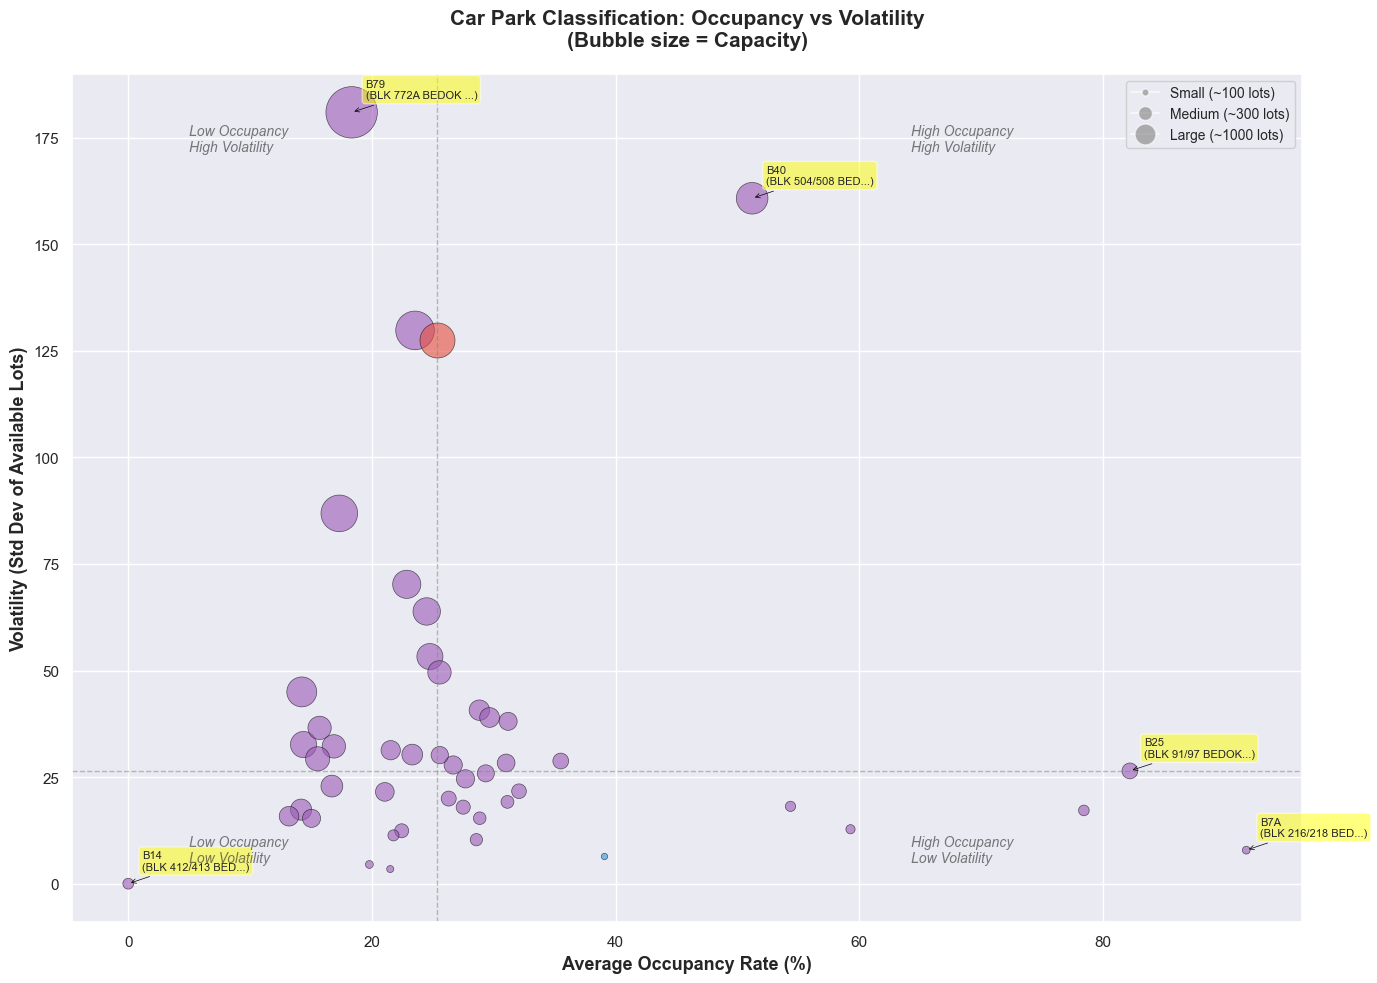

In [19]:
# Create figure
fig, ax = plt.subplots(figsize=(14, 10))

# Color mapping for agencies
agency_colors = {
    'HDB': '#9B59B6',  # Purple
    'LTA': '#E74C3C',  # Red
    'URA': '#3498DB'   # Blue
}

# Plot each agency separately for legend
for agency in stats_df['agency'].unique():
    agency_data = stats_df[stats_df['agency'] == agency]
    
    ax.scatter(
        agency_data['average_occupancy_rate (%)'],
        agency_data['std_available_lots'],
        s=agency_data['capacity_estimation'],  # Size by capacity
        alpha=0.6,
        c=agency_colors.get(agency, '#95A5A6'),
        label=f'{agency} ({len(agency_data)} car parks)',
        edgecolors='black',
        linewidth=0.5
    )

# Add labels for interesting points
# Label the 5 most extreme points
extreme_points = pd.concat([
    stats_df.nlargest(2, 'std_available_lots'),  # Most volatile
    stats_df.nlargest(2, 'average_occupancy_rate (%)'),  # Busiest
    stats_df.nsmallest(1, 'average_occupancy_rate (%)')  # Least busy
])

for _, row in extreme_points.iterrows():
    ax.annotate(
        f"{row['carpark_id']}\n({row['development'][:15]}...)",
        xy=(row['average_occupancy_rate (%)'], row['std_available_lots']),
        xytext=(10, 10),
        textcoords='offset points',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='black', lw=0.5)
    )

# Add quadrant lines
median_occ = stats_df['average_occupancy_rate (%)'].median()
median_vol = stats_df['std_available_lots'].median()

ax.axvline(median_occ, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax.axhline(median_vol, color='gray', linestyle='--', alpha=0.5, linewidth=1)

# Add quadrant labels
ax.text(5, stats_df['std_available_lots'].max() * 0.95, 'Low Occupancy\nHigh Volatility',
        fontsize=10, alpha=0.6, style='italic')
ax.text(stats_df['average_occupancy_rate (%)'].max() * 0.7, stats_df['std_available_lots'].max() * 0.95, 
        'High Occupancy\nHigh Volatility',
        fontsize=10, alpha=0.6, style='italic')
ax.text(5, 5, 'Low Occupancy\nLow Volatility',
        fontsize=10, alpha=0.6, style='italic')
ax.text(stats_df['average_occupancy_rate (%)'].max() * 0.7, 5, 'High Occupancy\nLow Volatility',
        fontsize=10, alpha=0.6, style='italic')

# Labels and title
ax.set_xlabel('Average Occupancy Rate (%)', fontsize=13, fontweight='bold')
ax.set_ylabel('Volatility (Std Dev of Available Lots)', fontsize=13, fontweight='bold')
ax.set_title('Car Park Classification: Occupancy vs Volatility\n(Bubble size = Capacity)', 
             fontsize=15, fontweight='bold', pad=20)

# Legend
legend = ax.legend(loc='upper right', fontsize=11, framealpha=0.9)
legend.set_title('Agency', prop={'size': 12, 'weight': 'bold'})

# Add size legend
from matplotlib.lines import Line2D
size_legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Small (~100 lots)',
           markerfacecolor='gray', markersize=5, alpha=0.6),
    Line2D([0], [0], marker='o', color='w', label='Medium (~300 lots)',
           markerfacecolor='gray', markersize=10, alpha=0.6),
    Line2D([0], [0], marker='o', color='w', label='Large (~1000 lots)',
           markerfacecolor='gray', markersize=15, alpha=0.6),
]
ax.legend(handles=legend.get_patches() + size_legend_elements, 
          loc='upper right', fontsize=10, framealpha=0.9)

# Grid
ax.grid(True, alpha=1)

# Adjust layout
plt.tight_layout()
plt.show()

In [20]:
# Print insights
print(f"\na. KEY INSIGHTS:")
print(f"• Median occupancy: {median_occ:.2f}%")
print(f"• Median volatility: {median_vol:.2f} lots")

# Identify quadrants
high_occ_high_vol = stats_df[(stats_df['average_occupancy_rate (%)'] > median_occ) & (stats_df['std_available_lots'] > median_vol)]
high_occ_low_vol = stats_df[(stats_df['average_occupancy_rate (%)'] > median_occ) & (stats_df['std_available_lots'] <= median_vol)]
low_occ_high_vol = stats_df[(stats_df['average_occupancy_rate (%)'] <= median_occ) & (stats_df['std_available_lots'] > median_vol)]
low_occ_low_vol = stats_df[(stats_df['average_occupancy_rate (%)'] <= median_occ) & (stats_df['std_available_lots'] <= median_vol)]

print(f"\nb. QUADRANT DISTRIBUTION:")
print(f"• High Occupancy, High Volatility: {len(high_occ_high_vol)} car parks (Busy & Unpredictable)")
print(f"• High Occupancy, Low Volatility: {len(high_occ_low_vol)} car parks (Busy & Stable)")
print(f"• Low Occupancy, High Volatility: {len(low_occ_high_vol)} car parks (Underutilized & Variable)")
print(f"• Low Occupancy, Low Volatility: {len(low_occ_low_vol)} car parks (Underutilized & Stable)")

print(f"\nc. INTERPRETATION:")
print(f"• High Volatility car parks are harder to predict")
print(f"• High Occupancy car parks may need capacity expansion")
print(f"• Low Occupancy car parks might be oversized or poorly located")
print(f"• Bubble size shows capacity - larger = more spaces")



a. KEY INSIGHTS:
• Median occupancy: 25.30%
• Median volatility: 26.46 lots

b. QUADRANT DISTRIBUTION:
• High Occupancy, High Volatility: 9 car parks (Busy & Unpredictable)
• High Occupancy, Low Volatility: 14 car parks (Busy & Stable)
• Low Occupancy, High Volatility: 14 car parks (Underutilized & Variable)
• Low Occupancy, Low Volatility: 10 car parks (Underutilized & Stable)

c. INTERPRETATION:
• High Volatility car parks are harder to predict
• High Occupancy car parks may need capacity expansion
• Low Occupancy car parks might be oversized or poorly located
• Bubble size shows capacity - larger = more spaces


1.3 Hour-of-day pattern using heatmap

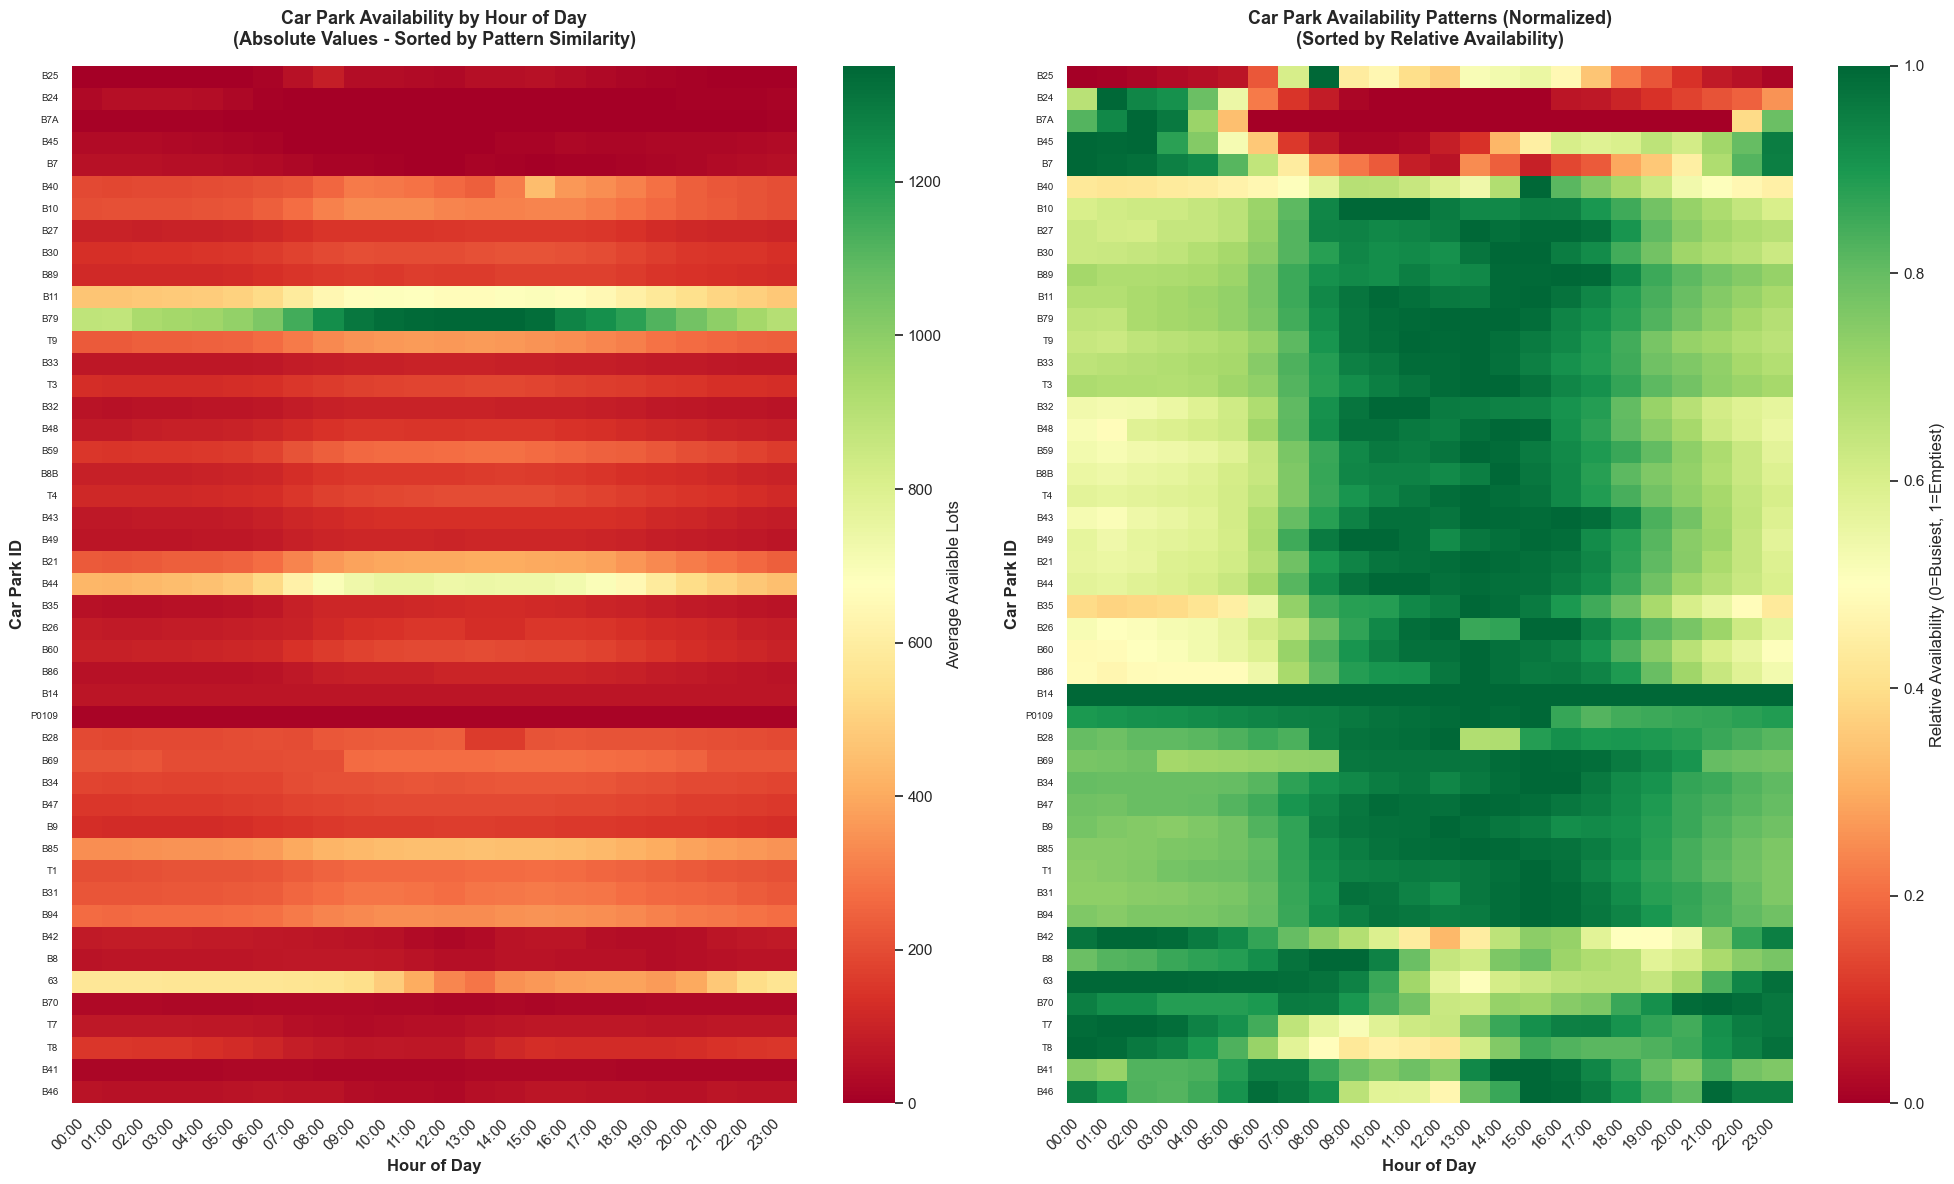

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram

temp_df = resampled_df.copy()
temp_df["hour"] = temp_df["timestamp"].dt.hour

hourly_average = temp_df.pivot_table(
    values='available_lots',
    index='carpark_id',
    columns='hour',
    aggfunc='mean'
)

# Normalize by row (each car park's pattern relative to its own range)
# This helps compare patterns regardless of capacity
hourly_normalized = hourly_average.div(hourly_average.max(axis=1), axis=0)

# Perform hierarchical clustering to sort car parks by similarity
linkage_matrix = linkage(hourly_normalized.fillna(0), method='ward')

dendro = dendrogram(linkage_matrix, no_plot=True)
order = dendro['leaves']

# Reorder the dataframe
hourly_sorted = hourly_average.iloc[order]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

sns.heatmap(
    hourly_sorted,
    cmap='RdYlGn',
    ax=ax1,
    cbar_kws={'label': 'Average Available Lots'},
    linewidths=0,
    yticklabels=True,
    xticklabels=True
)

ax1.set_title('Car Park Availability by Hour of Day\n(Absolute Values - Sorted by Pattern Similarity)', 
              fontsize=13, fontweight='bold', pad=15)
ax1.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax1.set_ylabel('Car Park ID', fontsize=12, fontweight='bold')

# Make x-axis labels more readable
ax1.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=7)

hourly_normalized_sorted = hourly_normalized.iloc[order]

sns.heatmap(
    hourly_normalized_sorted,
    cmap='RdYlGn',
    ax=ax2,
    cbar_kws={'label': 'Relative Availability (0=Busiest, 1=Emptiest)'},
    linewidths=0,
    yticklabels=True,
    xticklabels=True,
    vmin=0,
    vmax=1
)

ax2.set_title('Car Park Availability Patterns (Normalized)\n(Sorted by Relative Availability)', 
              fontsize=13, fontweight='bold', pad=15)
ax2.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax2.set_ylabel('Car Park ID', fontsize=12, fontweight='bold')

ax2.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=7)

# Add annotations for pattern types
# Identify peak hours for each car park
peak_hours = hourly_normalized_sorted.idxmin(axis=1)  # Hour with lowest availability (busiest)

morning_peak = (peak_hours >= 7) & (peak_hours <= 10)
afternoon_peak = (peak_hours >= 11) & (peak_hours <= 15)
evening_peak = (peak_hours >= 16) & (peak_hours <= 20)
night_stable = (peak_hours >= 21) | (peak_hours <= 6)

plt.tight_layout()

In [22]:
print(f"\na. PEAK HOUR DISTRIBUTION:")
print(f"Morning peak (7-10am): {morning_peak.sum()} car parks")
print(f"Afternoon peak (11-3pm): {afternoon_peak.sum()} car parks")
print(f"Evening peak (4-8pm): {evening_peak.sum()} car parks")
print(f"Night/stable (9pm-6am): {night_stable.sum()} car parks")


a. PEAK HOUR DISTRIBUTION:
Morning peak (7-10am): 3 car parks
Afternoon peak (11-3pm): 7 car parks
Evening peak (4-8pm): 2 car parks
Night/stable (9pm-6am): 35 car parks


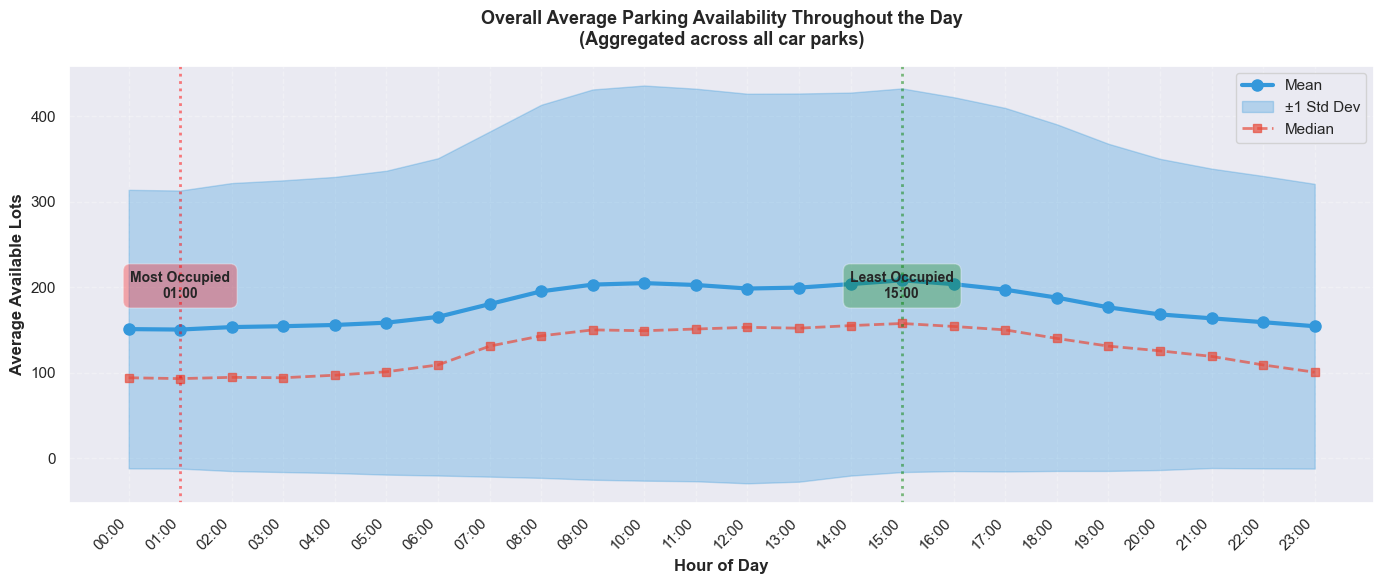

In [23]:
fig2, ax3 = plt.subplots(figsize=(14, 6))

# Calculate overall average by hour (across all car parks)
overall_hourly = temp_df.groupby('hour')['available_lots'].agg(['mean', 'std', 'median'])

# Plot
ax3.plot(overall_hourly.index, overall_hourly['mean'], 
         linewidth=3, marker='o', markersize=8, label='Mean', color='#3498DB')
ax3.fill_between(overall_hourly.index, 
                 overall_hourly['mean'] - overall_hourly['std'],
                 overall_hourly['mean'] + overall_hourly['std'],
                 alpha=0.3, color='#3498DB', label='±1 Std Dev')
ax3.plot(overall_hourly.index, overall_hourly['median'], 
         linewidth=2, linestyle='--', marker='s', markersize=6, 
         label='Median', color='#E74C3C', alpha=0.7)

# Styling
ax3.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax3.set_ylabel('Average Available Lots', fontsize=12, fontweight='bold')
ax3.set_title('Overall Average Parking Availability Throughout the Day\n(Aggregated across all car parks)', 
              fontsize=13, fontweight='bold', pad=15)
ax3.set_xticks(range(24))
ax3.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.legend(fontsize=11, loc='best')

# Highlight peak hours
# Ensure the hour values are converted to numeric (int/float) before passing to plotting functions
busiest_hour = overall_hourly['mean'].idxmin()
emptiest_hour = overall_hourly['mean'].idxmax()

# Convert to float for plotting (matplotlib expects numeric x positions)
busiest_hour_f = float(busiest_hour)
emptiest_hour_f = float(emptiest_hour)

ax3.axvline(busiest_hour_f, color='red', linestyle=':', alpha=0.5, linewidth=2)
ax3.axvline(emptiest_hour_f, color='green', linestyle=':', alpha=0.5, linewidth=2)

# Use int() for formatting in text labels, but pass floats for the x coordinate
ax3.text(busiest_hour_f, overall_hourly['mean'].max() * 0.9, 
         f'Most Occupied\n{int(busiest_hour):02d}:00', 
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='red', alpha=0.3))
ax3.text(emptiest_hour_f, overall_hourly['mean'].max() * 0.9, 
         f'Least Occupied\n{int(emptiest_hour):02d}:00', 
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='green', alpha=0.3))

plt.tight_layout()

In [24]:
print(f"\na. OVERALL HOURLY INSIGHTS:")
print(f"   Busiest hour: {busiest_hour:02d}:00 (Avg: {overall_hourly.loc[busiest_hour, 'mean']:.0f} lots available)")
print(f"   Least busy hour: {emptiest_hour:02d}:00 (Avg: {overall_hourly.loc[emptiest_hour, 'mean']:.0f} lots available)")
print(f"   Difference: {overall_hourly.loc[emptiest_hour, 'mean'] - overall_hourly.loc[busiest_hour, 'mean']:.0f} lots")


a. OVERALL HOURLY INSIGHTS:
   Busiest hour: 01:00 (Avg: 150 lots available)
   Least busy hour: 15:00 (Avg: 208 lots available)
   Difference: 58 lots


1.4 Geographic Map

In [25]:
import folium
from folium.plugins import MarkerCluster, HeatMap

# Validate coordinates
print(f"Longitude range: {stats_df['longitude'].min():.4f} to {stats_df['longitude'].max():.4f}")
print(f"Latitude range: {stats_df['latitude'].min():.4f} to {stats_df['latitude'].max():.4f}")

# Calculate map center
map_center = [stats_df['latitude'].mean(), stats_df['longitude'].mean()]

# Create base map
carpark_map = folium.Map(
    location=map_center, 
    zoom_start=12,
    tiles='OpenStreetMap'
)

# Add marker cluster
marker_cluster = MarkerCluster(name='Car Parks').add_to(carpark_map)

# Add markers
for idx, row in stats_df.iterrows():
    # Color coding based on occupancy
    if row['average_occupancy_rate (%)'] >= 30.2:
        color = 'red'
        status = 'High Demand'
    elif row['average_occupancy_rate (%)'] >= 25.85:
        color = 'orange'
        status = 'Upper-Medium Demand'
    elif row['average_occupancy_rate (%)'] >= 18.55:
        color = 'blue'
        status = 'Low-Medium Demand'
    else:
        color = 'green'
        status = 'Low Demand'
    
    popup_text = f"""
    <div style="font-family: Arial; width: 250px;">
        <h4 style="margin: 0 0 10px 0;">{row['development']}</h4>
        <table style="width: 100%; font-size: 12px;">
            <tr><td><b>Carpark ID:</b></td><td>{row['carpark_id']}</td></tr>
            <tr><td><b>Agency:</b></td><td>{row['agency']}</td></tr>
            <tr><td colspan="2"><hr style="margin: 5px 0;"></td></tr>
            <tr><td><b>Status:</b></td><td><span style="color: {color};">{status}</span></td></tr>
            <tr><td><b>Capacity:</b></td><td>{row['capacity_estimation']} lots</td></tr>
            <tr><td><b>Avg Occupied:</b></td><td>{row['average_occupancy']:.0f} lots</td></tr>
            <tr><td><b>Occupancy Rate:</b></td><td>{row['average_occupancy_rate (%)']:.1f}%</td></tr>
            <tr><td colspan="2"><hr style="margin: 5px 0;"></td></tr>
            <tr><td><b>Volatility:</b></td><td>{row['std_available_lots']:.1f}</td></tr>
            <tr><td><b>Peak Hour:</b></td><td>{row['peak_hour']:02d}:00</td></tr>
        </table>
    </div>
    """
    
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=f"{row['development']} - {row['average_occupancy_rate (%)']:.0f}%",
        icon=folium.Icon(color=color, icon='car', prefix='fa')
    ).add_to(marker_cluster)

# Add legend
legend_html = '''
<div style="position: fixed; 
     top: 10px; right: 10px; width: 220px; 
     border:2px solid grey; z-index:9999; font-size:13px;
     background-color: white; padding: 12px; border-radius: 5px;
     box-shadow: 2px 2px 6px rgba(0,0,0,0.3);">
     <p style="margin: 0 0 10px 0; font-size: 15px;"><b>🅿️ Occupancy Rate</b></p>
     <p style="margin: 5px 0;"><i class="fa fa-map-marker fa-2x" style="color:green"></i> Low (&lt;50%)</p>
     <p style="margin: 5px 0;"><i class="fa fa-map-marker fa-2x" style="color:orange"></i> Medium (50-80%)</p>
     <p style="margin: 5px 0;"><i class="fa fa-map-marker fa-2x" style="color:red"></i> High (&gt;80%)</p>
</div>
'''

# Add layer control
folium.LayerControl().add_to(carpark_map)

carpark_map

Longitude range: 103.9222 to 103.9498
Latitude range: 1.3248 to 1.3846


## <b>E. Machine Learning</b>


In [27]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

First Case:

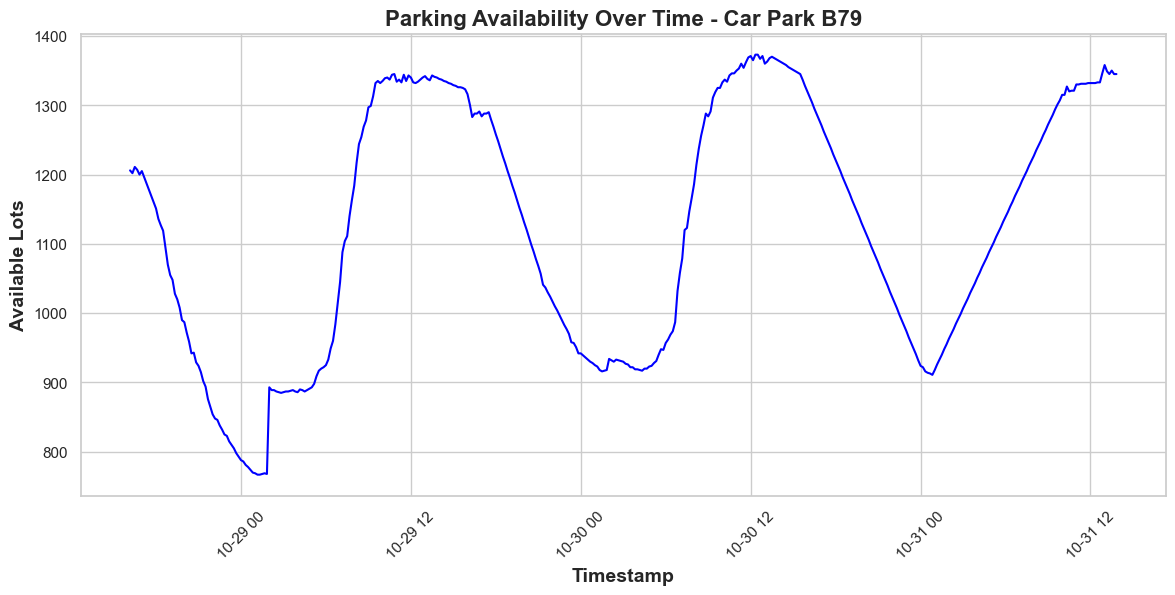

In [35]:
df_1 = resampled_df[resampled_df["carpark_id"] == "B79"]

sns.set (style="whitegrid")

plt.figure (figsize=(14,6))
sns.lineplot(data=df_1, x="timestamp", y="available_lots", color = "blue")

plt.title ("Parking Availability Over Time - Car Park B79", fontsize=16, fontweight='bold')
plt.xlabel ("Timestamp", fontsize=14, fontweight='bold')
plt.ylabel ("Available Lots", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.show()

In [39]:
# Prepare data for LSTM model 
avail_lots = resampled_df[resampled_df["carpark_id"] == "B79"]["available_lots"].values # convert to numpy array

training_data_len = int(np.ceil( len(avail_lots) * 0.85)) # 85% for training

# Preprocessing Stages
scaler = StandardScaler()
scaled_data = scaler.fit_transform(avail_lots.reshape(-1,1))

training_data = scaled_data[:training_data_len] #95% of all out data

X_train, y_train = [], []


# Create a sliding window
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [41]:
# Build the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Train the model
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, 
    y_train, 
    batch_size=32, 
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4858
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1795
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0968
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0747
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0552
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0431
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0466
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0512
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0476
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0354
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0377
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0351
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0340
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0348
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0292
Epoc

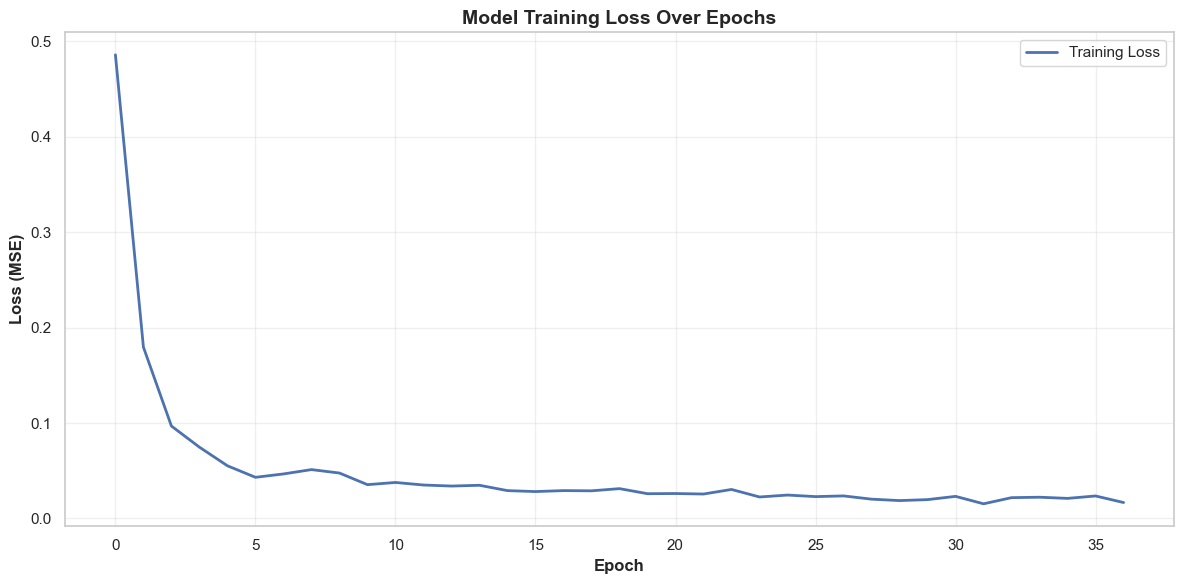

Final training loss: 0.016685


In [43]:
# Plot training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.title('Model Training Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training loss: {history.history['loss'][-1]:.6f}")

In [44]:
# Prepare test data
test_data = scaled_data[training_data_len - 60:]

X_test = []
y_test = avail_lots[training_data_len:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"Test data shape: {X_test.shape}")
print(f"Number of test samples: {len(y_test)}")

Test data shape: (62, 60, 1)
Number of test samples: 62


In [45]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

print(f"Predictions shape: {predictions.shape}")
print(f"Sample predictions (first 10):")
print(predictions[:10].flatten())

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 405ms/step
Predictions shape: (62, 1)
Sample predictions (first 10):
[1034.86   1043.6431 1052.2078 1060.6543 1069.0231 1077.363  1085.6559
 1093.8447 1101.9061 1109.7847]


In [46]:
# Evaluate model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("=" * 50)
print("MODEL PERFORMANCE METRICS")
print("=" * 50)
print(f"Mean Squared Error (MSE):       {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} lots")
print(f"Mean Absolute Error (MAE):      {mae:.2f} lots")
print(f"R² Score:                       {r2:.4f}")
print("=" * 50)
print(f"\nInterpretation:")
print(f"• On average, predictions are off by ±{mae:.2f} parking lots")
print(f"• The model explains {r2*100:.2f}% of the variance in parking availability")

MODEL PERFORMANCE METRICS
Mean Squared Error (MSE):       202.11
Root Mean Squared Error (RMSE): 14.22 lots
Mean Absolute Error (MAE):      11.00 lots
R² Score:                       0.9802

Interpretation:
• On average, predictions are off by ±11.00 parking lots
• The model explains 98.02% of the variance in parking availability


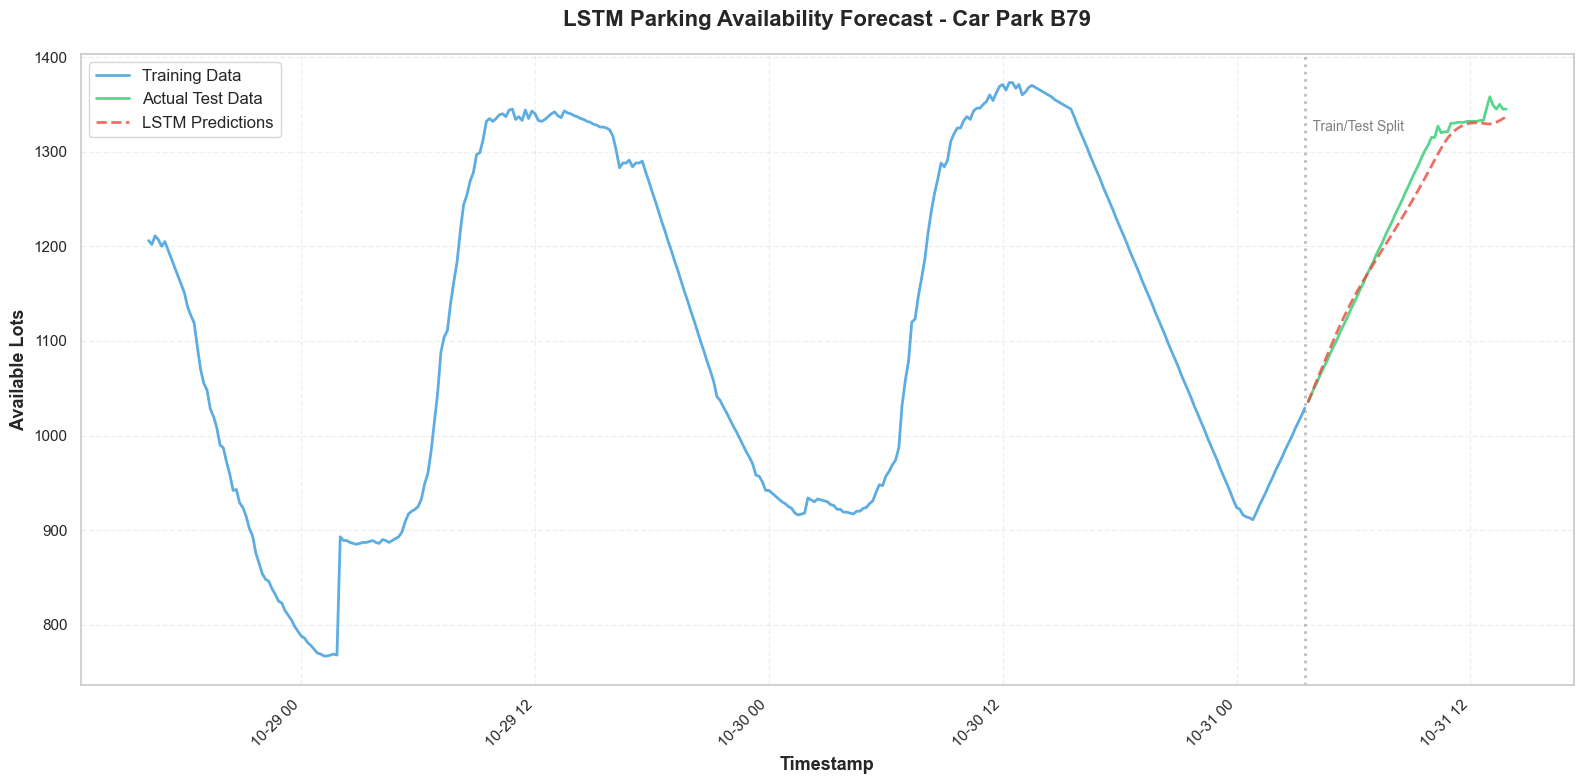

In [47]:
# Visualize predictions vs actual values
train = resampled_df[resampled_df["carpark_id"] == "B79"][:training_data_len]
test = resampled_df[resampled_df["carpark_id"] == "B79"][training_data_len:]

# Create predictions dataframe
valid = test.copy()
valid = valid.iloc[:len(predictions)]  # Match predictions length
valid['predictions'] = predictions

plt.figure(figsize=(16, 8))

# Plot full data
plt.plot(train['timestamp'], train['available_lots'], 
         label='Training Data', color='#3498DB', linewidth=2, alpha=0.8)
plt.plot(valid['timestamp'], valid['available_lots'], 
         label='Actual Test Data', color='#2ECC71', linewidth=2, alpha=0.8)
plt.plot(valid['timestamp'], valid['predictions'], 
         label='LSTM Predictions', color='#E74C3C', linewidth=2, linestyle='--', alpha=0.8)

# Styling
plt.title('LSTM Parking Availability Forecast - Car Park B79', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
plt.ylabel('Available Lots', fontsize=13, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45, ha='right')

# Add vertical line to separate train/test
plt.axvline(x=train['timestamp'].iloc[-1], color='gray', linestyle=':', linewidth=2, alpha=0.5)
plt.text(train['timestamp'].iloc[-1], plt.ylim()[1] * 0.95, '  Train/Test Split', 
         rotation=0, verticalalignment='top', fontsize=10, color='gray')

plt.tight_layout()
plt.show()

### Future Forecast (Next 24 hours)

In [51]:
# Forecast the next 24 hours (144 time steps, since data is in 10-min intervals)
forecast_steps = 144  # 24 hours * 6 (10-min intervals per hour)

# Get the last 60 data points to start forecasting
last_60_points = scaled_data[-60:]
forecast_input = last_60_points.reshape(1, 60, 1)

# Store forecasted values
future_predictions = []

# Iteratively predict
for _ in range(forecast_steps):
    # Predict next value (model.predict returns array shaped (1,1))
    next_pred = model.predict(forecast_input, verbose=0)
    # Append scalar prediction
    future_predictions.append(float(next_pred.ravel()[0]))
    
    # Prepare new element with the same 3D shape as forecast_input: (1, 1, 1)
    new_element = next_pred.reshape(1, 1, 1)
    
    # Update input: drop oldest timestep and append new prediction along time axis
    forecast_input = np.concatenate([forecast_input[:, 1:, :], new_element], axis=1)

# Convert predictions back to original scale
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

# Create timestamps for future predictions
last_timestamp = resampled_df[resampled_df["carpark_id"] == "B79"]["timestamp"].iloc[-1]
future_timestamps = pd.date_range(start=last_timestamp + pd.Timedelta(minutes=10), 
                                  periods=forecast_steps, 
                                  freq='10min')

print(f"Generated {len(future_predictions)} future predictions")
print(f"Forecast period: {future_timestamps[0]} to {future_timestamps[-1]}")

Generated 144 future predictions
Forecast period: 2025-10-31 14:00:00 to 2025-11-01 13:50:00


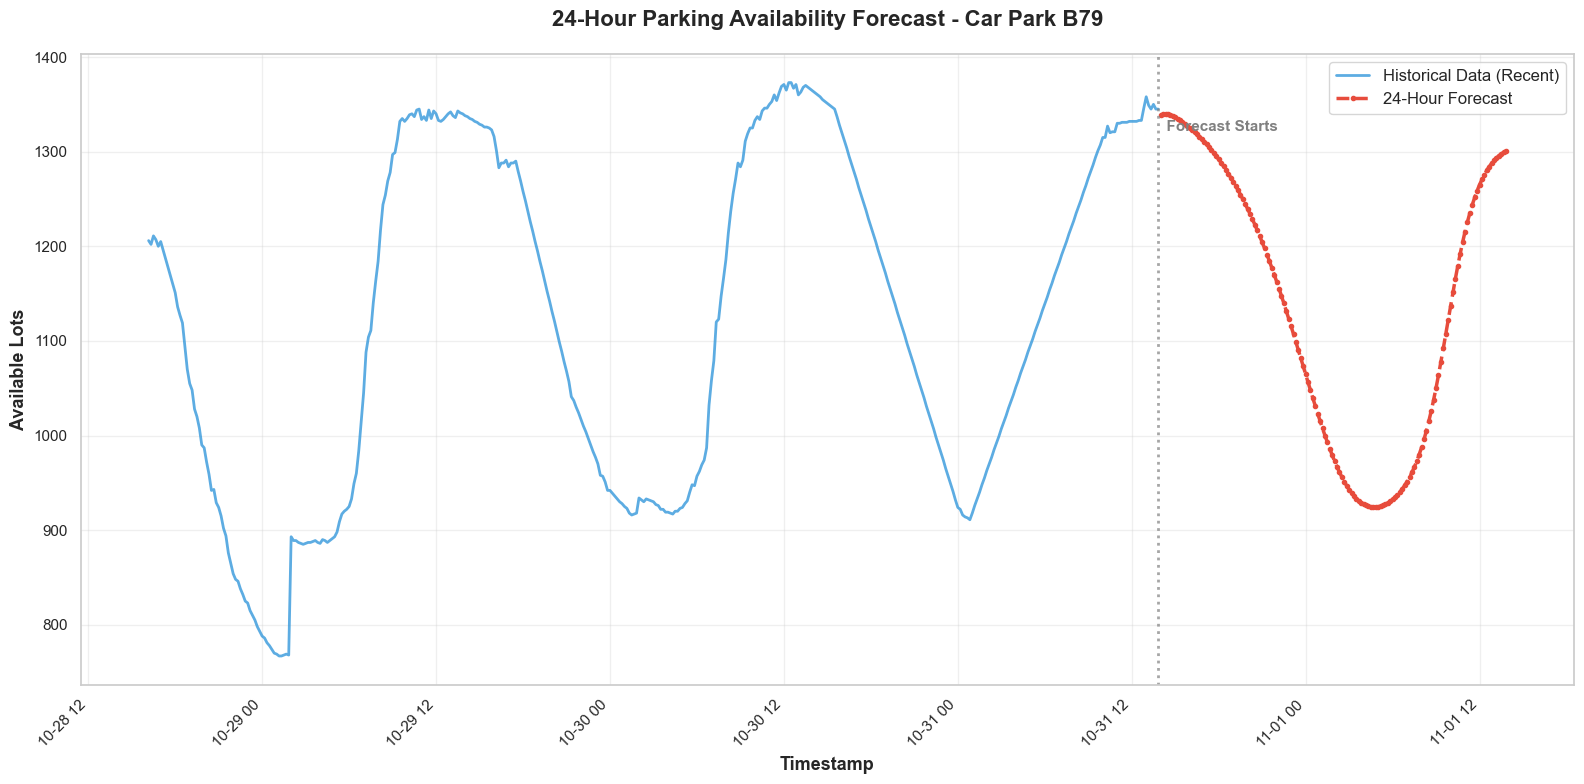

In [52]:
# Visualize future forecast
plt.figure(figsize=(16, 8))

# Get recent historical data (last 7 days for context)
recent_data = resampled_df[resampled_df["carpark_id"] == "B79"].tail(1000)

plt.plot(recent_data['timestamp'], recent_data['available_lots'], 
         label='Historical Data (Recent)', color='#3498DB', linewidth=2, alpha=0.8)
plt.plot(future_timestamps, future_predictions, 
         label='24-Hour Forecast', color='#E74C3C', linewidth=2.5, linestyle='--', marker='o', markersize=3)

# Add vertical line at forecast start
plt.axvline(x=last_timestamp, color='gray', linestyle=':', linewidth=2, alpha=0.7)
plt.text(last_timestamp, plt.ylim()[1] * 0.95, '  Forecast Starts', 
         rotation=0, verticalalignment='top', fontsize=11, color='gray', fontweight='bold')

plt.title('24-Hour Parking Availability Forecast - Car Park B79', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
plt.ylabel('Available Lots', fontsize=13, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

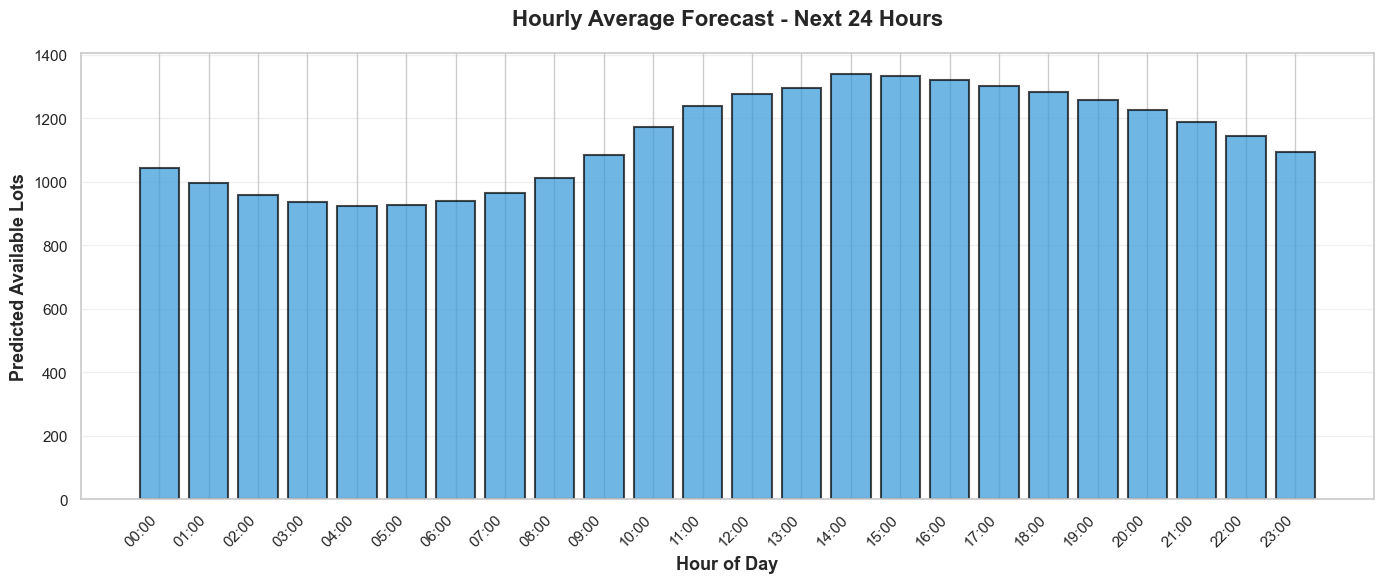


24-HOUR FORECAST INSIGHTS
Minimum predicted availability: 924 lots at 2025-11-01 04:40:00
Maximum predicted availability: 1340 lots at 2025-10-31 14:20:00
Average predicted availability: 1136 lots


In [53]:
# Create hourly summary of forecast
forecast_df = pd.DataFrame({
    'timestamp': future_timestamps,
    'predicted_available_lots': future_predictions.flatten()
})

forecast_df['hour'] = forecast_df['timestamp'].dt.hour
hourly_forecast = forecast_df.groupby('hour')['predicted_available_lots'].mean().reset_index()

plt.figure(figsize=(14, 6))
plt.bar(hourly_forecast['hour'], hourly_forecast['predicted_available_lots'], 
        color='#3498DB', alpha=0.7, edgecolor='black', linewidth=1.5)

plt.title('Hourly Average Forecast - Next 24 Hours', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=13, fontweight='bold')
plt.ylabel('Predicted Available Lots', fontsize=13, fontweight='bold')
plt.xticks(hourly_forecast['hour'], [f'{h:02d}:00' for h in hourly_forecast['hour']], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print forecast insights
print("\n" + "=" * 60)
print("24-HOUR FORECAST INSIGHTS")
print("=" * 60)
print(f"Minimum predicted availability: {future_predictions.min():.0f} lots at {future_timestamps[future_predictions.argmin()]}")
print(f"Maximum predicted availability: {future_predictions.max():.0f} lots at {future_timestamps[future_predictions.argmax()]}")
print(f"Average predicted availability: {future_predictions.mean():.0f} lots")
print("=" * 60)

Second Case:

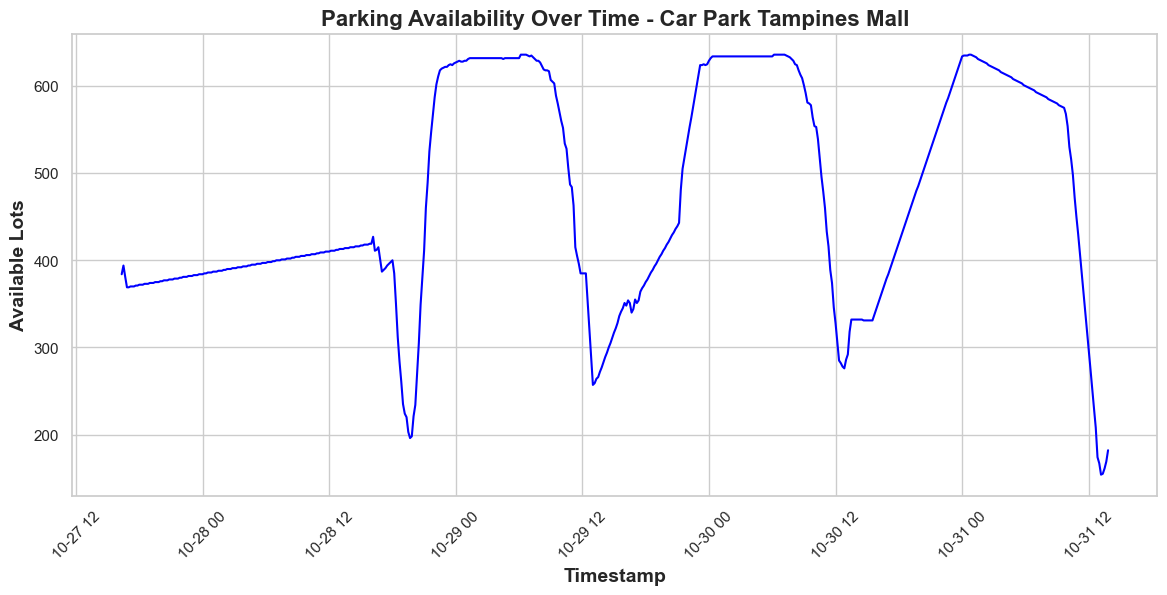

In [56]:
df_2 = resampled_df[resampled_df["development"] == "Tampines Mall"]

sns.set (style="whitegrid")

plt.figure (figsize=(14,6))
sns.lineplot(data=df_2, x="timestamp", y="available_lots", color = "blue")

plt.title ("Parking Availability Over Time - Car Park Tampines Mall", fontsize=16, fontweight='bold')
plt.xlabel ("Timestamp", fontsize=14, fontweight='bold')
plt.ylabel ("Available Lots", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.show()

In [58]:
# Prepare data for LSTM model 
avail_lots = resampled_df[resampled_df["development"] == "Tampines Mall"]["available_lots"].values # convert to numpy array

training_data_len = int(np.ceil( len(avail_lots) * 0.85)) # 85% for training

# Preprocessing Stages
scaler = StandardScaler()
scaled_data = scaler.fit_transform(avail_lots.reshape(-1,1))

training_data = scaled_data[:training_data_len] #95% of all out data

X_train, y_train = [], []


# Create a sliding window
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [59]:
# Build the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Train the model
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, 
    y_train, 
    batch_size=32, 
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.5528
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.5528
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2553
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2553
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1444
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1444
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1254
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1254
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1064
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1064
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0935
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0935
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0767
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0767
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0878
Epoch 9/50

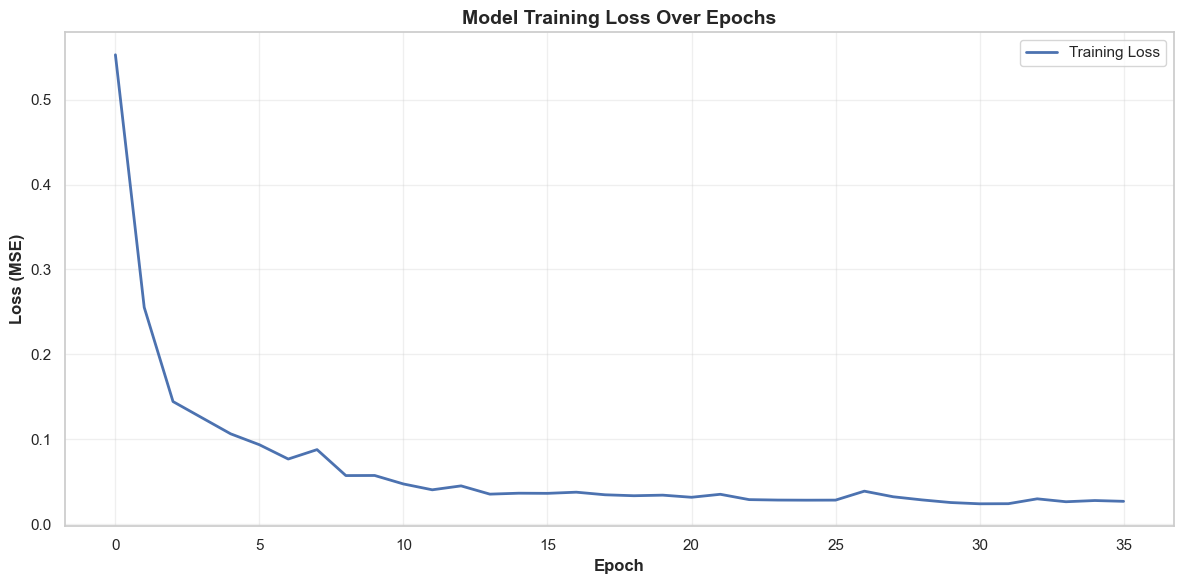

Final training loss: 0.026880


In [61]:
# Plot training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.title('Model Training Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training loss: {history.history['loss'][-1]:.6f}")

In [62]:
# Prepare test data
test_data = scaled_data[training_data_len - 60:]

X_test = []
y_test = avail_lots[training_data_len:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"Test data shape: {X_test.shape}")
print(f"Number of test samples: {len(y_test)}")

Test data shape: (84, 60, 1)
Number of test samples: 84


In [63]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

print(f"Predictions shape: {predictions.shape}")
print(f"Sample predictions (first 10):")
print(predictions[:10].flatten())

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Predictions shape: (84, 1)
Sample predictions (first 10):
[620.55743 625.2785  629.8385  633.93896 637.29095 639.7232  641.16046
 641.5832  641.0283  639.58856]
Predictions shape: (84, 1)
Sample predictions (first 10):
[620.55743 625.2785  629.8385  633.93896 637.29095 639.7232  641.16046
 641.5832  641.0283  639.58856]


In [64]:
# Evaluate model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("=" * 50)
print("MODEL PERFORMANCE METRICS")
print("=" * 50)
print(f"Mean Squared Error (MSE):       {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} lots")
print(f"Mean Absolute Error (MAE):      {mae:.2f} lots")
print(f"R² Score:                       {r2:.4f}")
print("=" * 50)
print(f"\nInterpretation:")
print(f"• On average, predictions are off by ±{mae:.2f} parking lots")
print(f"• The model explains {r2*100:.2f}% of the variance in parking availability")

MODEL PERFORMANCE METRICS
Mean Squared Error (MSE):       708.44
Root Mean Squared Error (RMSE): 26.62 lots
Mean Absolute Error (MAE):      18.15 lots
R² Score:                       0.9681

Interpretation:
• On average, predictions are off by ±18.15 parking lots
• The model explains 96.81% of the variance in parking availability


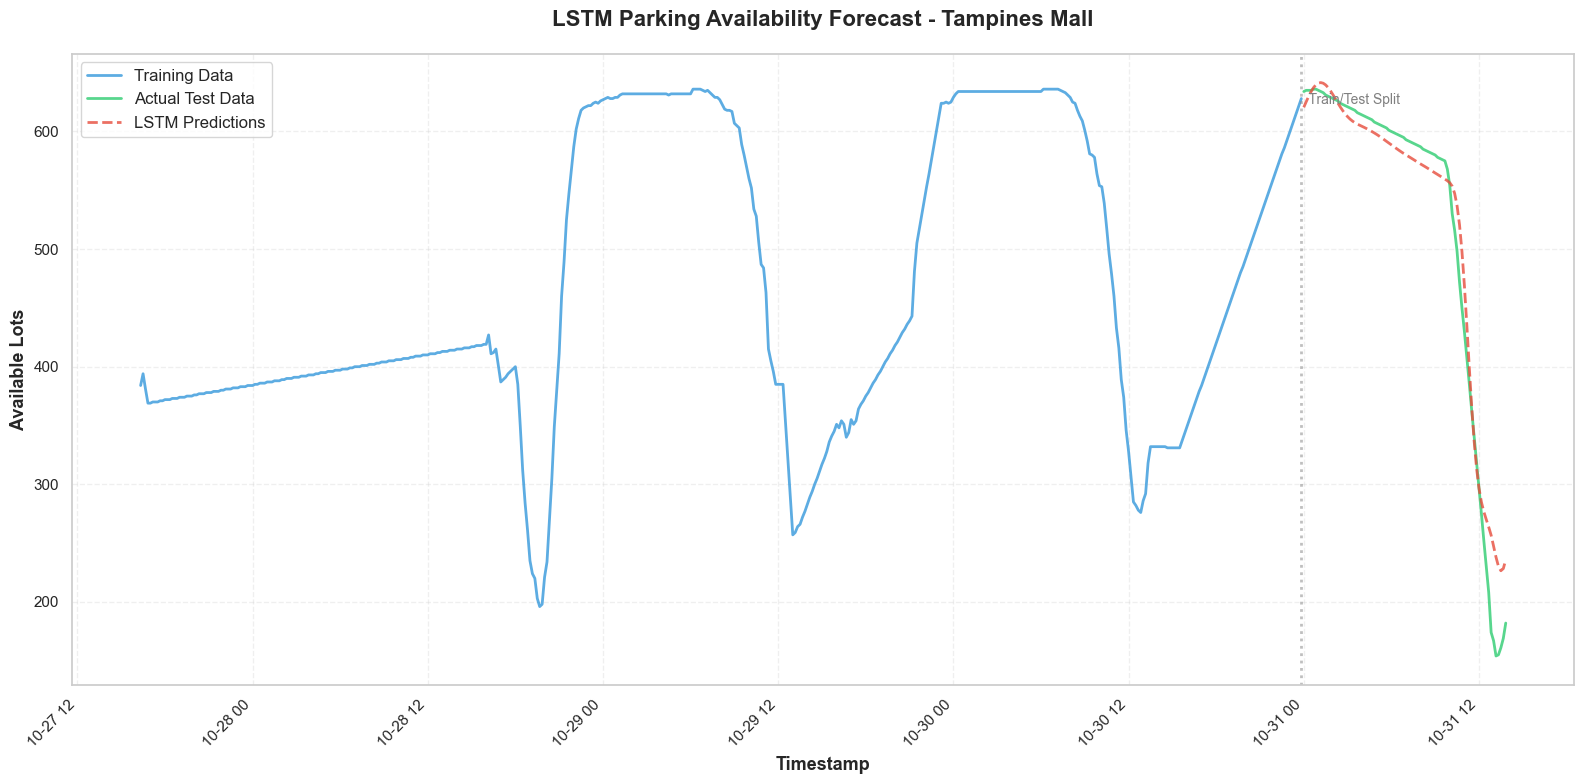

In [66]:
# Visualize predictions vs actual values
train = resampled_df[resampled_df["development"] == "Tampines Mall"][:training_data_len]
test = resampled_df[resampled_df["development"] == "Tampines Mall"][training_data_len:]

# Create predictions dataframe
valid = test.copy()
valid = valid.iloc[:len(predictions)]  # Match predictions length
valid['predictions'] = predictions

plt.figure(figsize=(16, 8))

# Plot full data
plt.plot(train['timestamp'], train['available_lots'], 
         label='Training Data', color='#3498DB', linewidth=2, alpha=0.8)
plt.plot(valid['timestamp'], valid['available_lots'], 
         label='Actual Test Data', color='#2ECC71', linewidth=2, alpha=0.8)
plt.plot(valid['timestamp'], valid['predictions'], 
         label='LSTM Predictions', color='#E74C3C', linewidth=2, linestyle='--', alpha=0.8)

# Styling
plt.title('LSTM Parking Availability Forecast - Tampines Mall', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
plt.ylabel('Available Lots', fontsize=13, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45, ha='right')

# Add vertical line to separate train/test
plt.axvline(x=train['timestamp'].iloc[-1], color='gray', linestyle=':', linewidth=2, alpha=0.5)
plt.text(train['timestamp'].iloc[-1], plt.ylim()[1] * 0.95, '  Train/Test Split', 
         rotation=0, verticalalignment='top', fontsize=10, color='gray')

plt.tight_layout()
plt.show()

In [67]:
# Forecast the next 24 hours (144 time steps, since data is in 10-min intervals)
forecast_steps = 144  # 24 hours * 6 (10-min intervals per hour)

# Get the last 60 data points to start forecasting
last_60_points = scaled_data[-60:]
forecast_input = last_60_points.reshape(1, 60, 1)

# Store forecasted values
future_predictions = []

# Iteratively predict
for _ in range(forecast_steps):
    # Predict next value (model.predict returns array shaped (1,1))
    next_pred = model.predict(forecast_input, verbose=0)
    # Append scalar prediction
    future_predictions.append(float(next_pred.ravel()[0]))
    
    # Prepare new element with the same 3D shape as forecast_input: (1, 1, 1)
    new_element = next_pred.reshape(1, 1, 1)
    
    # Update input: drop oldest timestep and append new prediction along time axis
    forecast_input = np.concatenate([forecast_input[:, 1:, :], new_element], axis=1)

# Convert predictions back to original scale
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

# Create timestamps for future predictions
last_timestamp = resampled_df[resampled_df["development"] == "Tampines Mall"]["timestamp"].iloc[-1]
future_timestamps = pd.date_range(start=last_timestamp + pd.Timedelta(minutes=10), 
                                  periods=forecast_steps, 
                                  freq='10min')

print(f"Generated {len(future_predictions)} future predictions")
print(f"Forecast period: {future_timestamps[0]} to {future_timestamps[-1]}")

Generated 144 future predictions
Forecast period: 2025-10-31 14:00:00 to 2025-11-01 13:50:00


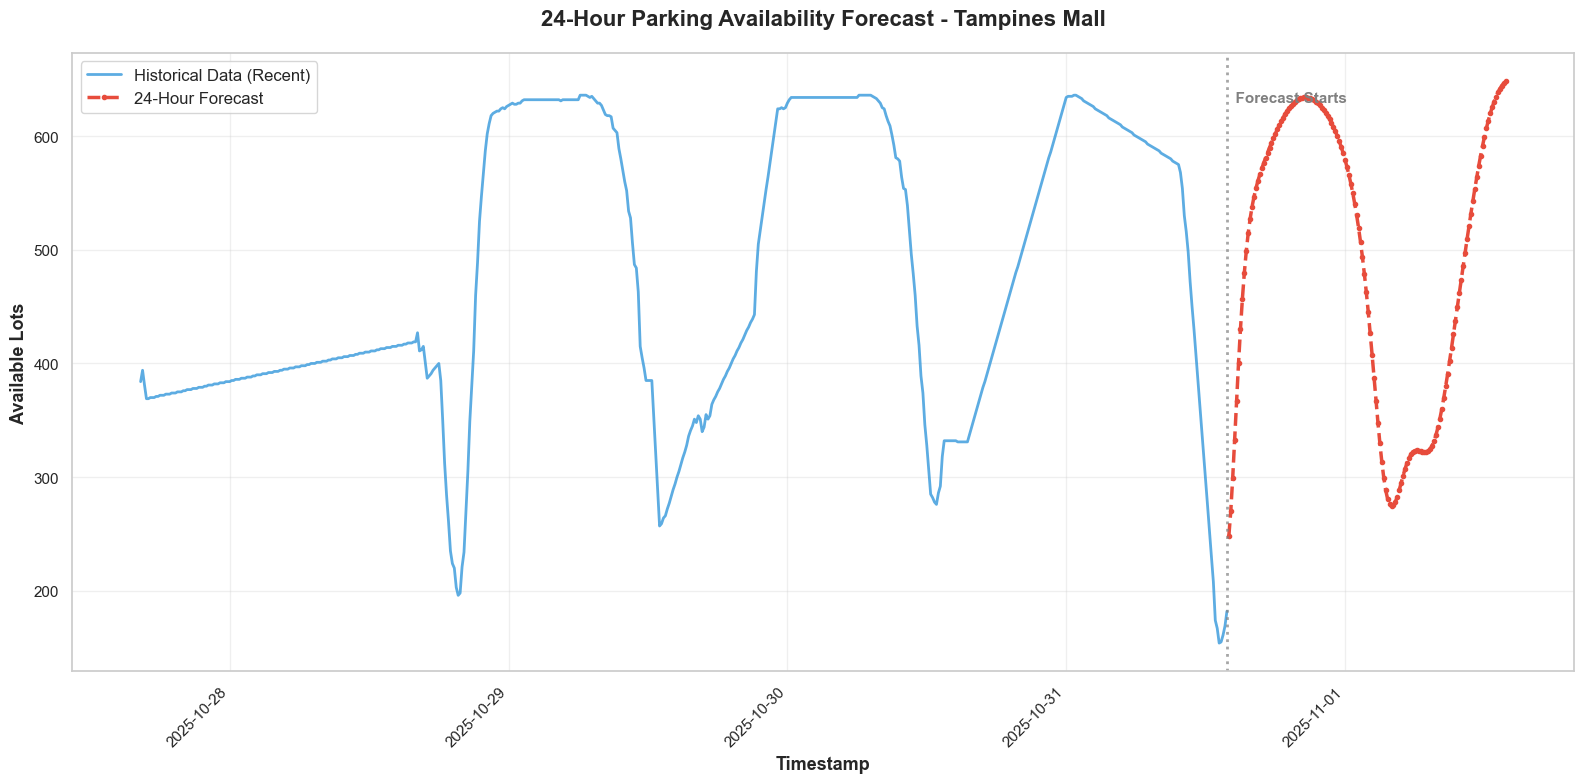

In [68]:
# Visualize future forecast
plt.figure(figsize=(16, 8))

# Get recent historical data (last 7 days for context)
recent_data = resampled_df[resampled_df["development"] == "Tampines Mall"].tail(1000)

plt.plot(recent_data['timestamp'], recent_data['available_lots'], 
         label='Historical Data (Recent)', color='#3498DB', linewidth=2, alpha=0.8)
plt.plot(future_timestamps, future_predictions, 
         label='24-Hour Forecast', color='#E74C3C', linewidth=2.5, linestyle='--', marker='o', markersize=3)

# Add vertical line at forecast start
plt.axvline(x=last_timestamp, color='gray', linestyle=':', linewidth=2, alpha=0.7)
plt.text(last_timestamp, plt.ylim()[1] * 0.95, '  Forecast Starts', 
         rotation=0, verticalalignment='top', fontsize=11, color='gray', fontweight='bold')

plt.title('24-Hour Parking Availability Forecast - Tampines Mall', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Timestamp', fontsize=13, fontweight='bold')
plt.ylabel('Available Lots', fontsize=13, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

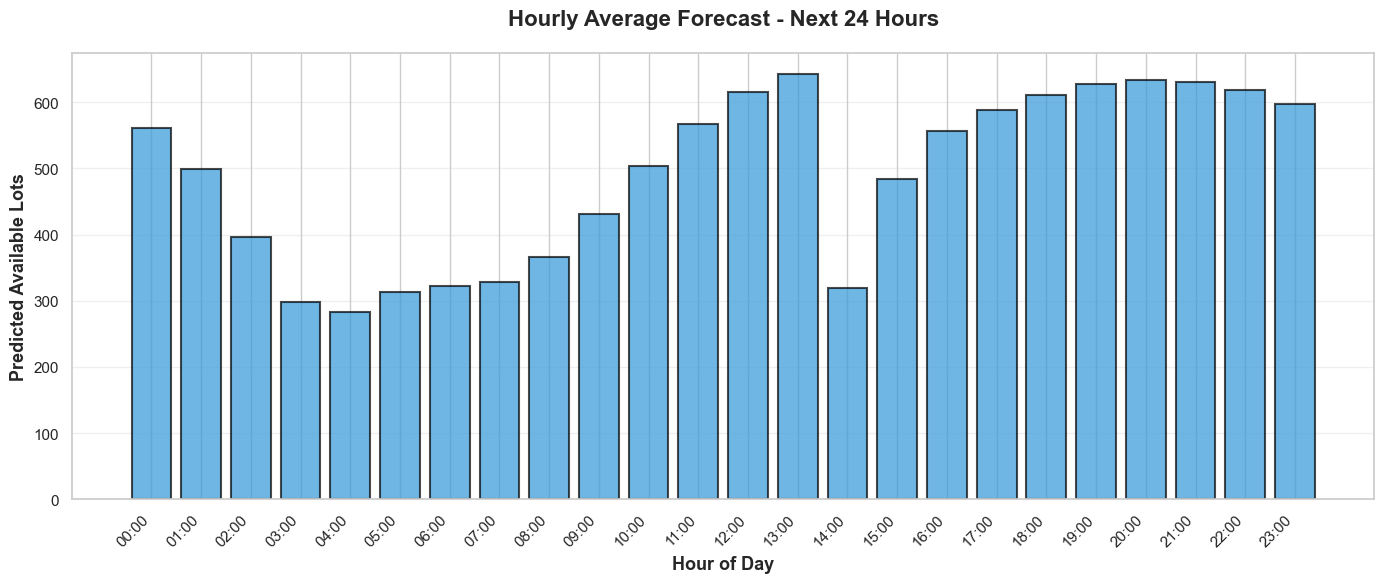


24-HOUR FORECAST INSIGHTS
Minimum predicted availability: 248 lots at 2025-10-31 14:00:00
Maximum predicted availability: 648 lots at 2025-11-01 13:50:00
Average predicted availability: 491 lots


In [69]:
# Create hourly summary of forecast
forecast_df = pd.DataFrame({
    'timestamp': future_timestamps,
    'predicted_available_lots': future_predictions.flatten()
})

forecast_df['hour'] = forecast_df['timestamp'].dt.hour
hourly_forecast = forecast_df.groupby('hour')['predicted_available_lots'].mean().reset_index()

plt.figure(figsize=(14, 6))
plt.bar(hourly_forecast['hour'], hourly_forecast['predicted_available_lots'], 
        color='#3498DB', alpha=0.7, edgecolor='black', linewidth=1.5)

plt.title('Hourly Average Forecast - Next 24 Hours', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=13, fontweight='bold')
plt.ylabel('Predicted Available Lots', fontsize=13, fontweight='bold')
plt.xticks(hourly_forecast['hour'], [f'{h:02d}:00' for h in hourly_forecast['hour']], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print forecast insights
print("\n" + "=" * 60)
print("24-HOUR FORECAST INSIGHTS")
print("=" * 60)
print(f"Minimum predicted availability: {future_predictions.min():.0f} lots at {future_timestamps[future_predictions.argmin()]}")
print(f"Maximum predicted availability: {future_predictions.max():.0f} lots at {future_timestamps[future_predictions.argmax()]}")
print(f"Average predicted availability: {future_predictions.mean():.0f} lots")
print("=" * 60)